In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import re

from collections import Counter

from task_3_embedding.preprocess import CorpusPreprocessor

## Testing the class

In [2]:
cp = CorpusPreprocessor(r"D:\dnn-exercises\data\train_shuf.txt")

In [3]:
cp.transform_text()

In [4]:
cp.extract_vocab()

In [5]:
len(cp.vocab)

187304

In [15]:
cp.transformed_corpus[5000]

'budzi to rozgoryczenie rolników uważających że zostali skrzywdzeni gdyż nie otrzymują dopłat za gospodarowanie w warunkach zbliżonych do warunków rolników posiadających gospodarstwa w obrębach zaliczonych do onw położonych w gminach które do onw nie zostały zaliczone'

## EDA of the text

How many words longer than 2 characters

In [6]:
sum(map(lambda x: x[1] > 2, cp.vocab))

49680

In [13]:
letters = list(itertools.chain(*map(lambda x: x[0], cp.vocab)))

In [14]:
len(set(letters))

35

In [20]:
wordlens = Counter(list(map(lambda x: len(x[0]), cp.vocab)))

<BarContainer object of 57 artists>

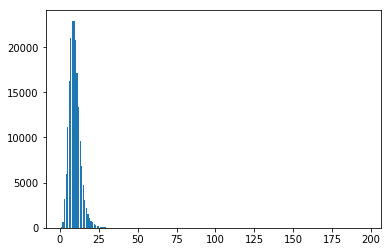

In [22]:
plt.bar(x = wordlens.keys(), height = wordlens.values())

In [34]:
np.quantile(list(map(lambda x: len(x[0]), cp.vocab)), .95)

16.0

Select 16 as cutoff, as is 95-th percentile.

#### Distribution of sentence lengths

(array([4.9066e+04, 3.8129e+04, 9.6080e+03, 2.3430e+03, 5.9800e+02,
        1.6900e+02, 4.9000e+01, 2.6000e+01, 7.0000e+00, 5.0000e+00]),
 array([  1.,  14.,  27.,  40.,  53.,  66.,  79.,  92., 105., 118., 131.]),
 <a list of 10 Patch objects>)

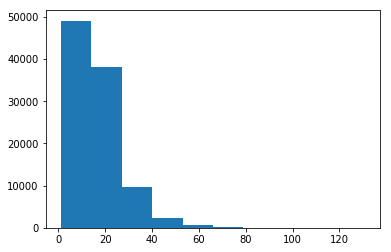

In [18]:
plt.hist(x = list(map(lambda x: len(x.split(' ')), cp.transformed_corpus)))

In [17]:
np.quantile(list(map(lambda x: len(x.split(' ')), cp.transformed_corpus)), 0.95)

35.0

## Some random attempts at things

In [5]:
with open(r"D:\dnn-exercises\data\train_shuf.txt", 'r', encoding='utf8') as f:
    text = f.readlines(15 * 1024 * 1024)

In [14]:
text[12].replace('\n', '')

'W ośmiu z szesnastu opisanych dotąd chorób spowodowanych mutacjami dynamicznymi przyczyną choroby jest ekspansja kodonu CAG (oznaczającego aminokwas glutaminę) w sekwencji kodującej genu.'

In [24]:
a = re.sub('[^\w ]+', '', text[12])

In [34]:
a.lower()

'w ośmiu z szesnastu opisanych dotąd chorób spowodowanych mutacjami dynamicznymi przyczyną choroby jest ekspansja kodonu cag oznaczającego aminokwas glutaminę w sekwencji kodującej genu'

In [39]:
a_c = Counter(a)

In [42]:
a_c.most_common(len(a_c))

[(' ', 22),
 ('o', 15),
 ('n', 13),
 ('a', 13),
 ('c', 11),
 ('s', 10),
 ('i', 8),
 ('e', 8),
 ('m', 7),
 ('u', 7),
 ('z', 7),
 ('y', 7),
 ('j', 7),
 ('d', 6),
 ('t', 5),
 ('w', 5),
 ('k', 5),
 ('p', 4),
 ('h', 4),
 ('ą', 4),
 ('r', 3),
 ('g', 3),
 ('b', 2),
 ('W', 1),
 ('ś', 1),
 ('ó', 1),
 ('C', 1),
 ('A', 1),
 ('G', 1),
 ('l', 1),
 ('ę', 1)]

In [56]:
list(itertools.chain(*[[1,2], [2,3]]))

[1, 2, 2, 3]

In [58]:
list(map(lambda x: x.split(), text[0:10]))

[['System',
  'Euroraty',
  'Chcesz',
  'kupować',
  'więcej',
  'niż',
  'gdzie',
  'indziej?'],
 ['Parlament',
  'zdecydował',
  'jednak',
  'inaczej',
  'i',
  'przyjął',
  'w',
  'ustawie',
  'z',
  'dnia',
  '28.06.1996',
  'r.',
  'jednoinstancyjne',
  'postępowanie',
  'orzeczniczo-lekarskie.'],
 ['Po',
  'kampanii',
  'wrześniowej',
  '1.DLek',
  'raportowała',
  '77',
  'czołgów',
  'L.T.M.35',
  'utraconych',
  '(wraz',
  'z',
  'wozami',
  'dowodzenia)',
  'i',
  '52',
  'uszkodzone',
  'lub',
  'zepsute,',
  'lecz',
  'ostatecznie',
  'po',
  'naprawach',
  'straty',
  'bezpowrotne',
  'ograniczyły',
  'się',
  'do',
  '7',
  'czołgów',
  'i',
  'w',
  'lutym',
  '1940',
  'roku',
  'posiadano',
  '195',
  'czołgów',
  'na',
  'stanie.'],
 ['W',
  'rolach',
  'głównych',
  'wystąpili',
  'Jake',
  'Gyllenhaal,',
  'Forest',
  'Whitaker',
  'oraz',
  'Rachel',
  'McAdams.'],
 ['Zapieczone', 'z', 'pomidorami,', 'bazylią', 'i', 'serem', '...'],
 ['Może',
  'ten',
  'przypadek'